In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = utils.build_dataset(wav_number=120, random_sate=42)

In [4]:
df = df.drop(['fs', 'duration'], axis=1)

In [5]:
df.head()

,autocorr_pitch_mean,autocorr_pitch_median,cepstrum_pitch_mean,cepstrum_pitch_median,speaker,f1_mean,f2_mean,f3_mean,f4_mean,mfcc0,...,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
0,1580.222953,695.652174,214.641293,131.147541,bdl,1097.482478,3198.967687,4477.776535,6436.852874,610.808756,...,21.779512,-32.578171,-15.014953,-6.202989,-21.003697,-7.244908,-0.203736,-12.523297,-0.473632,-11.763421
1,1772.818679,1036.437247,265.161116,227.356069,bdl,629.438144,2579.956547,4114.298743,5974.653043,600.383026,...,26.718886,-28.893639,-13.040578,-16.432016,-20.813124,-3.901365,-0.612144,-14.475592,-0.175175,-10.311353
2,830.571465,592.592593,247.241679,153.113553,bdl,992.440152,2905.558430,4295.941592,6385.485725,577.538648,...,0.816862,-34.579061,-9.794879,-9.894116,-27.833927,-6.488367,0.110944,-8.415316,-0.428991,-15.412495
3,1179.242166,666.666667,214.398199,141.592920,bdl,833.797317,2824.310119,4209.274668,6335.580671,592.429400,...,13.512553,-33.938694,-19.110918,-17.792059,-27.124091,-6.549721,-0.247915,-10.915315,4.494983,-15.241390
4,1089.054476,516.129032,226.119623,140.350877,bdl,876.398876,2940.903584,4213.075565,6460.088395,594.046052,...,29.190178,-31.327890,-25.885223,-5.424303,-26.480775,-1.831086,-4.513335,-5.408009,2.335526,-8.498360


In [6]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
train_set['speaker'].value_counts()

slt    96
bdl    96
Name: speaker, dtype: int64

In [8]:
test_set['speaker'].value_counts()

slt    24
bdl    24
Name: speaker, dtype: int64

In [9]:
def encode(data):
    data = data.copy()
    code = {'bdl': 0, 'slt':1}
    data['speaker'] = data['speaker'].map(code)
    
    return data

In [10]:
def preprocessing(data):
    data = data.copy()
    data = encode(data)
    
    X = data.drop(['speaker'], axis=1)
    y = data[['speaker']]
    
    return X, y

In [11]:
X_train, y_train = preprocessing(train_set)
X_test, y_test = preprocessing(test_set)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [13]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, scoring='accuracy',
                                               cv=4, train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(6, 4))
    plt.plot(N, train_score.mean(axis=1), label='train_score')
    plt.plot(N, val_score.mean(axis=1), label='val_score')
    plt.legend()
    plt.grid()
    plt.margins(x=0)

[[24  0]
 [ 1 23]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.96      0.98        24

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



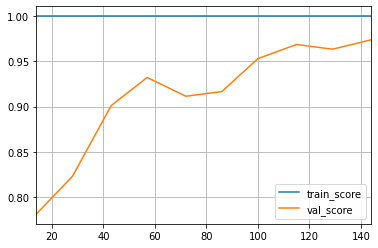

In [14]:
tree = DecisionTreeClassifier(random_state=42)
evaluation(tree)

<AxesSubplot:>

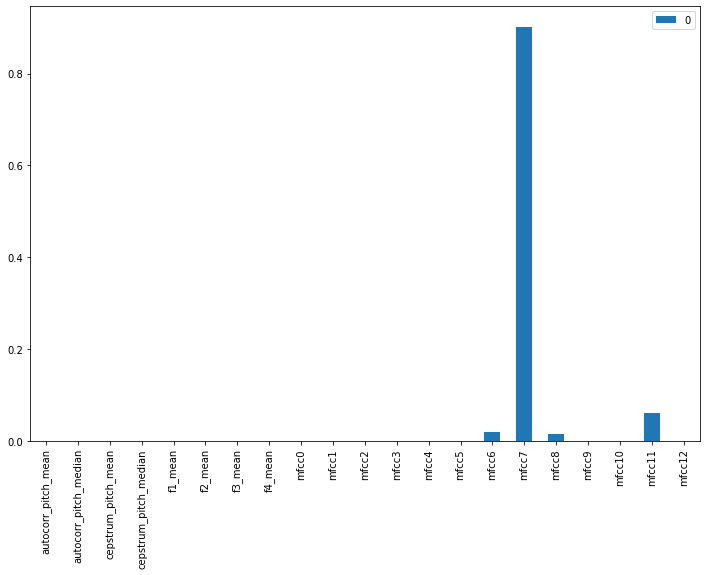

In [15]:
pd.DataFrame(tree.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

In [16]:
from sklearn.ensemble import RandomForestClassifier

[[24  0]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



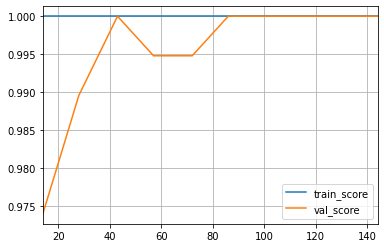

In [17]:
rforest = RandomForestClassifier(random_state=42)
evaluation(rforest)

<AxesSubplot:>

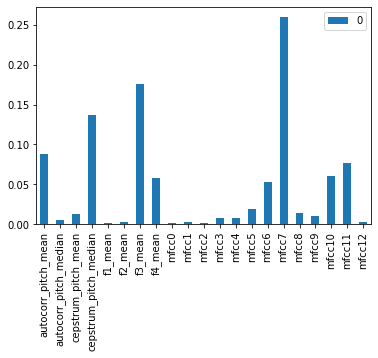

In [33]:
pd.DataFrame(rforest.feature_importances_, index=X_train.columns).plot.bar(figsize=(6, 4))

In [20]:
# man, woman = utils.pick_random_files(50, random_state=42)

In [21]:
# from scipy.io.wavfile import read

# fs, signal = read('cmu_us_bdl_arctic/wav/arctic_a0001.wav')
# formants = utils.formants(signal, 21, 10, fs)


# formants

In [22]:
# fs = []
# duration = []
# autocorr_pitch_mean = []
# autocorr_pitch_median = []
# cepstrum_pitch_mean = []
# cepstrum_pitch_median= []
# form = {}
# mfcc = {}
# # f_max = []
# n_formants = []
# speaker = []

In [23]:
# width = 21
# step = 10
# threshold = 5
# dn_formants = 4

# for i in range(13):
#         mfcc[f'mfcc{i}'] = []
        
# for i in range(dn_formants):
#         form[f'f{i}'] = []

# for sfs, signal in man:
#     formants = utils.formants(signal, width, step, sfs)
#     auto_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.autocorrelation, extend=False)
#     smfcc = utils.mfcc(signal, width, step, sfs)
#     cepstrum_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.cepstrum, extend=False)
    
#     for i in range(smfcc.shape[1]):
#         mfcc[f'mfcc{i}'].append(smfcc[:,i].mean())
        
#     for i in range(dn_formants):
#         form[f'f{i}'].append(formants[:,i].mean())
    
# #     for i, f in enumerate(formants[:dn_formants]):
# #         form[f'f{i}'].append(f)
    
#     fs.append(sfs)
#     duration.append(signal.size/sfs)
    
#     autocorr_pitch_mean.append(auto_pitch.mean())
#     autocorr_pitch_median.append(np.median(auto_pitch))
#     cepstrum_pitch_mean.append(cepstrum_pitch.mean())
#     cepstrum_pitch_median.append(np.median(cepstrum_pitch))
#     #f_max.append(formants[-1])
#     n_formants.append(formants.size)
#     speaker.append('bdl')
    
# for sfs, signal in woman:
#     formants = utils.formants(signal, width, step, sfs)
#     auto_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.autocorrelation, extend=False)
#     smfcc = utils.mfcc(signal, width, step, sfs)
#     cepstrum_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.cepstrum, extend=False)

    
#     for i in range(smfcc.shape[1]):
#         mfcc[f'mfcc{i}'].append(smfcc[:,i].mean())
        
#     for i in range(dn_formants):
#         form[f'f{i}'].append(formants[:,i].mean())
    
# #     for i, f in enumerate(formants[:dn_formants]):
# #         form[f'f{i}'].append(f)
    
#     fs.append(sfs)
#     duration.append(signal.size/sfs)
#     autocorr_pitch_mean.append(auto_pitch.mean())
#     autocorr_pitch_median.append(np.median(auto_pitch))
#     cepstrum_pitch_mean.append(cepstrum_pitch.mean())
#     cepstrum_pitch_median.append(np.median(cepstrum_pitch))
# #     f_max.append(formants[-1])
#     n_formants.append(formants.size)
#     speaker.append('slt')

In [24]:
# d = {'fs': fs, 'duration': duration, 'autocorr_pitch_mean': autocorr_pitch_mean, 'autocorr_pitch_median': autocorr_pitch_median,
#      'cepstrum_pitch_mean': cepstrum_pitch_mean, 'cepstrum_pitch_median': cepstrum_pitch_median,
#      'n_formants': n_formants, 'speaker': speaker}
# d.update(mfcc)
# d.update(form)
# df = pd.DataFrame(data=d)

In [25]:
# df

In [26]:
# for col in df.select_dtypes('float'):
#     plt.figure()
#     sns.distplot(df[col])

In [27]:
# bdl_df = df[df['speaker']=='bdl']
# slt_df = df[df['speaker']=='slt']

In [28]:
# for col in df.select_dtypes('float'):
#     plt.figure()
#     sns.distplot(bdl_df[col], label='bdl')
#     sns.distplot(slt_df[col], label='slt')
#     plt.legend()

In [29]:
# man, woman = utils.pick_random_files(300, random_state=68)

# fs = []
# duration = []
# autocorr_pitch_mean = []
# autocorr_pitch_median = []
# cepstrum_pitch_mean = []
# cepstrum_pitch_median= []
# form = {}
# mfcc = {}
# f_max = []
# n_formants = []
# speaker = []


# width = 21
# step = 10
# threshold = 5
# dn_formants = 13

# for i in range(13):
#         mfcc[f'mfcc{i}'] = []
        
# for i in range(dn_formants):
#         form[f'f{i}'] = []

# for sfs, signal in man:
#     formants = utils.formants(signal, width, step, sfs)
#     auto_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.autocorrelation, extend=False)
#     smfcc = utils.mfcc(signal, width, step, sfs)
    
#     for i in range(smfcc.shape[1]):
#         mfcc[f'mfcc{i}'].append(smfcc[:,i].mean())
    
#     for i, f in enumerate(formants[:dn_formants]):
#         form[f'f{i}'].append(f)
    
#     fs.append(sfs)
#     duration.append(signal.size/sfs)
#     cepstrum_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.cepstrum, extend=False)
#     autocorr_pitch_mean.append(auto_pitch.mean())
#     autocorr_pitch_median.append(np.median(auto_pitch))
#     cepstrum_pitch_mean.append(cepstrum_pitch.mean())
#     cepstrum_pitch_median.append(np.median(cepstrum_pitch))
#     f_max.append(formants[-1])
#     n_formants.append(formants.size)
#     speaker.append('bdl')
    
# for sfs, signal in woman:
#     formants = utils.formants(signal, width, step, sfs)
#     auto_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.autocorrelation, extend=False)
#     smfcc = utils.mfcc(signal, width, step, sfs)
    
#     for i in range(smfcc.shape[1]):
#         mfcc[f'mfcc{i}'].append(smfcc[:,i].mean())
    
#     for i, f in enumerate(formants[:dn_formants]):
#         form[f'f{i}'].append(f)
    
#     fs.append(sfs)
#     duration.append(signal.size/sfs)
#     cepstrum_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.cepstrum, extend=False)
#     autocorr_pitch_mean.append(auto_pitch.mean())
#     autocorr_pitch_median.append(np.median(auto_pitch))
#     cepstrum_pitch_mean.append(cepstrum_pitch.mean())
#     cepstrum_pitch_median.append(np.median(cepstrum_pitch))
#     f_max.append(formants[-1])
#     n_formants.append(formants.size)
#     speaker.append('slt')
    
    
# d = {'fs': fs, 'duration': duration, 'autocorr_pitch_mean': autocorr_pitch_mean, 'autocorr_pitch_median': autocorr_pitch_median,
#      'cepstrum_pitch_mean': cepstrum_pitch_mean, 'cepstrum_pitch_median': cepstrum_pitch_median,
#      'f_max': f_max, 'n_formants': n_formants, 'speaker': speaker}
# d.update(mfcc)
# d.update(form)
# df_test = pd.DataFrame(data=d)

In [30]:
# def rule_based_model(X):
#     if X['mfcc7'] >= -12:
#         return 'slt'
#     else:
#         return 'bdl'

In [31]:
# df_test.head()
# df_test_X = df_test.drop(['speaker'], axis=1)
# df_test_y = df_test[['speaker']]

# df_test_y['perdict'] = df_test_X.apply(rule_based_model, axis=1)
# sns.heatmap(pd.crosstab(df_test_y['speaker'], df_test_y['perdict']), annot=True, fmt='d', cbar=False)